In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
import cv2

In [ ]:
model = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
for layer in model.layers:
    layer.trainable = False
model.summary()    


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
a=model.output
a=Flatten()(a) 
a.shape

TensorShape([None, 50176])

In [ ]:
a=model.output
#a=Flatten()(a) 
a=GlobalAveragePooling2D()(a)
a=Dense(1024,activation='relu')(a) 
a=Dense(1024,activation='relu')(a) 
a=Dense(5,activation='softmax')(a) 

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model1=Model(inputs=model.input,outputs=a)

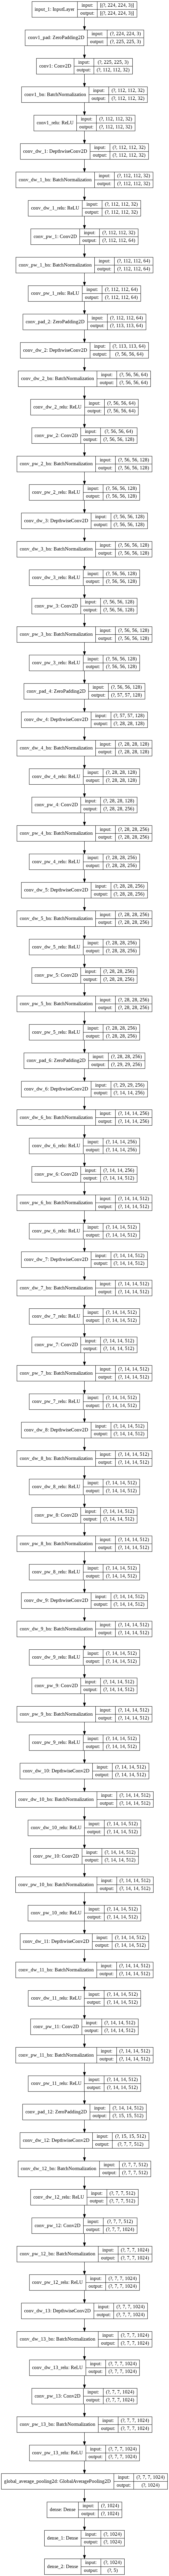

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:

!wget http://download.tensorflow.org/example_images/flower_photos.tgz

--2020-10-07 04:11:24--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.197.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz.1’

flower_photos.tgz.1 100%[===================>] 218.21M   127MB/s    in 1.7s    

2020-10-07 04:11:26 (127 MB/s) - ‘flower_photos.tgz.1’ saved [228813984/228813984]



In [ ]:
!tar zxvf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [ ]:
from glob import glob
import cv2
import numpy as np
import tensorflow as tf


In [ ]:
labels=['daisy','dandelion','roses','sunflowers','tulips']
path=[]

for location in labels:
     path.extend(glob('flower_photos/'+location+'/*.jpg'))

In [ ]:
X=[]
Y=[]
labels=['daisy','dandelion','roses','sunflowers','tulips']
for i in path:
        data=cv2.imread(i)
        data=cv2.resize(data, (224, 224))
        X.append(data)
        for j,label in enumerate(labels):
                  if label in i:
                      Y.append(j)
                      break  

In [ ]:
X=np.array(X)
Y=np.array(Y)       

In [ ]:
Y.shape

(3670,)

In [ ]:
Y=np.reshape(Y,(3670,1))

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

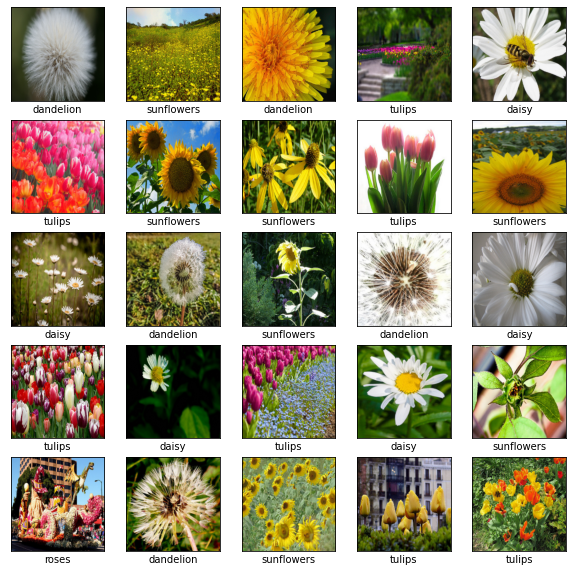

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i][...,::-1], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(labels[y_train[i][0]])
plt.show()

In [ ]:
X_train.shape

(2936, 224, 224, 3)

In [ ]:
y_train.shape

(2936, 1)

In [ ]:
X_test.shape

(734, 224, 224, 3)

In [ ]:
y_test.shape

(734, 1)

In [ ]:
model1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

new = model1.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=23)

Epoch 1/23
92/92 [==============================] - 5s 53ms/step - loss: 1.0133 - accuracy: 0.8910 - val_loss: 1.0689 - val_accuracy: 0.8351
Epoch 2/23
92/92 [==============================] - 4s 47ms/step - loss: 0.9950 - accuracy: 0.9097 - val_loss: 1.0513 - val_accuracy: 0.8529
Epoch 3/23
92/92 [==============================] - 4s 47ms/step - loss: 0.9907 - accuracy: 0.9131 - val_loss: 1.0626 - val_accuracy: 0.8420
Epoch 4/23
92/92 [==============================] - 4s 47ms/step - loss: 0.9954 - accuracy: 0.9091 - val_loss: 1.0947 - val_accuracy: 0.8106
Epoch 5/23
92/92 [==============================] - 4s 47ms/step - loss: 0.9950 - accuracy: 0.9097 - val_loss: 1.0549 - val_accuracy: 0.8488
Epoch 6/23
92/92 [==============================] - 4s 47ms/step - loss: 1.0117 - accuracy: 0.8924 - val_loss: 1.0313 - val_accuracy: 0.8733
Epoch 7/23
92/92 [==============================] - 4s 48ms/step - loss: 1.0136 - accuracy: 0.8913 - val_loss: 1.0547 - val_accuracy: 0.8515
Epoch 8/23
92

In [ ]:
new.history

{'accuracy': [0.891008198261261,
  0.9097411632537842,
  0.9131471514701843,
  0.9090599417686462,
  0.9097411632537842,
  0.8923705816268921,
  0.8913487792015076,
  0.9111035466194153,
  0.906335175037384,
  0.919618546962738,
  0.9080381393432617,
  0.906335175037384,
  0.9145095348358154,
  0.9104223251342773,
  0.8801090121269226,
  0.917574942111969,
  0.9220027327537537,
  0.9117847681045532,
  0.9029291272163391,
  0.917574942111969,
  0.9097411632537842,
  0.9162125587463379,
  0.9311988949775696],
 'loss': [1.0132943391799927,
  0.9949726462364197,
  0.9907241463661194,
  0.9953773617744446,
  0.994987964630127,
  1.011661410331726,
  1.013635277748108,
  0.994033694267273,
  0.9980347156524658,
  0.9851797819137573,
  0.9963701367378235,
  0.9977882504463196,
  0.9899521470069885,
  0.9946263432502747,
  1.024916172027588,
  0.9870614409446716,
  0.9820672273635864,
  0.9924407005310059,
  1.0021874904632568,
  0.9866700768470764,
  0.9948633909225464,
  0.9885310530662537,


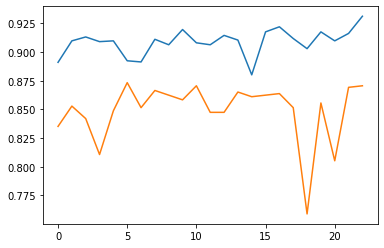

In [ ]:
plt.plot(new.history['accuracy'])
plt.plot(new.history['val_accuracy'])


In [ ]:
model1.predict(X_test)

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
!wget 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFRUXGBcaGRcXGBcXGBgZGhcXFx4YGBoaHSgiGBslHRcXITEiJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBEQACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAIFAAEGBwj/xABDEAABAgQEAgcGBAQFAwUBAAABAhEAAwQhEjFBUQVhBhMicYGRoRQyscHR8AdCUuEWI2LxM1NygpJUorIVNENjcxf/xAAbAQACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EADgRAAIBAwMCBAMHAwMFAQAAAAABAgMEERIhMQVBEyJRYXGBoRQykbHB0fBCUuEVIzMGFlOC8WL/2gAMAwEAAhEDEQA/APW2iZAyADcAzIAMgA3ABoiACBTDERaACaRAM5bph05lUEwSly1rWpGNLFITmQxu4yzaK5TwbbSzdffOEcFWfitVrU0tMqWk5MkqUPFRY+UQ8RnWpdNtdSUm2KUPS+oTOlzZ82ZOTLJUEY8AJIIuwyvsYWrfJ0q/TKHhONNJZ7nsvA+IGfIlzlSzKxh8KiCW0LjQ5jVovW6PH1qXhVHDOcHKdLvxBFDV+zrklaTLSoKBYgkq01FhtrEJTw8Gm3tFWhnOGcTUfiXWrcpUhA0CZYNu9WcVOpI7dHpdtjdZ/EjSdPq0Kczse6VS0N/2gH1hqo+5q/0uzqeVRx8Gz0voFxyZWSVrm9XjStsKAoEJYMVAk5nFlF0Xk831G1hQq6aece508MwGoAMgAyADDABBSYAI4IYAlogAkhMABGgA00ABYQjIBm4AMgAyADcAGQCNGGMg4dnD7awDw+TlPxH4XWT5CEUiUEpXjUSrDMGH3erOhLqcgg6DOISTfBotakacm5HgNXXLK+25IAS0y5SE2wXuAMmivSdSFVrZA3JuB3hrQsGpNtZQeRXFBdr84Wk0RutC3Ou4b+INYhAQmfZgAFJScO2EqB7mha2gVvZ1nqlBZ+ayVvGOJqqV46hRWsBgpQuA5LWAs5PnEdWXudGNvawjpUMfiKy5KXABDH08ImsD0xSxAJW8Pzw5pzbMd8LCYpQVT7uz9hSkrZyF4UKUFEM6CpJL6dnOFhpZyZJTbn4dRJ+7Pozoxw5cikky1lRWEDHiUVnGe0oOdASQOQjRHZLJ5G5lGVWTjxkdpKpE0FUtaVgEglJBYpLEW1Bh6kyuVKUeUwzQys00AzGgA0YANPABAiADaRABuADUAGKVDECM+ADXtEAGe0wAZ7VABWdIOksqkldbNJYkJCQzqJuwfkCfCFJpcmi2t5V56YnC134rLNpUpCAfzKUVkdyQAH7zFXiHbpdGpJrxJ5+Gxzlb0oqVi1XPUXLkKwBuQS0JyO1CxtVHywX5ldw6sWklcqZMSollKClOoncpLnIWJivVgthRoVY6Ult/P4jo5HTKslIwInKsXxTGmLJOmJTsOXrE1KWCuXQreU9U/wAFscfxKUJsxcxYJmLUVKU5DqUSolmbfKFqZVV6dQTxBMURJmS1DCQxyuRbRxu0PJnVCtSksA69KMZC8xbEnJyHyMHJTcaNbjPn2D0/DnQ4UCDk4PrEJSWNzbbWcpw8ryMCUpIulx/Spx5HKIfM2wVWCxKD+Tz9GQ64OCyh4NElqz2ITq03ymvkOJCUpz7RzLu789YmWUIxT1IvehPCP5yapWAkF5aF/mKDdZGoBy5h9Ikjz3VK89c9C24bL/pD0/qhIn086nZSrInyFHCkKZQYXKmFncPlDcjHRtIuSnDO3qsnmvta0lwFIIa6XSCdwNDzEUyfod5NtPMcr3X5ZOp6P9PKqQQeuVNRkUTVFSTyxHtIV93gjUaI1un2txDONL9V+p6twPprR1OFIX1cwsOrXY4jok5K8IvjNM87ddLr0MyazH1R0Jiw5xBTQgwDJhgRKxABHrRABEzxAI114gAOtMMQEyYAwDmSYBCU1BgDIBT7wBk8r/EniYWUyjNRNAUogSwxl5DCtWIhRz005xVPLO3YwUYNuLTfucQioZgGHfc+cV4wdCFxuophlS3RjxE+o/aAu2nHOrf0CU9agBgki7uC+WT/AHrEGWUbiEY4SG5dViLh3/3edoSkboV1J5yO9ak6Hm93PLlFjmuGb4VExaavtPh/3Fn7gIhqT5ZnqSk55jH5v9itVSNJWtROIzGY6gA9p++0WJ7Hko0azqTlLjPISlnkJKErBFiCHYHYg5RVPc7VrcNR0RfzG6aoNxY/GIROlSuXHZhAbE32ZtTFvYbzJZYzQ01MpQ6wzEJu5QQe7Sw5CJI51zbV9/Alv6DFJKKZqzKmrTKB7GL3wcgAXN3fwF8og3vscB9TqU4ypyim+Hn/AAKdYpC1y8ePCohie0L914W6PR9OuHOipJp7fMkuZi/KCOTW8NIMnU8TVHDwwC6NB90lJNrXHJx84MJmadumm47NheGVipMxGNCipBDKQzgjIuxyh8Gac5Sp+FL8sr5nrvAek8taerE2YuYBiPWAYmLWdKQkgEtGiLTPK39nVovXKKUXtsWp4sImc3IJfFYBZBHicAZBq4jAGQZ4hAGSPt8AZOvgA0YABTIYmKrRDIlR0koETKeYhc3qUlN5jthALkm4cWuDpCZbRlKE1KKyeQTEUMv+XIm+0zCpXbVKZKUhLFOFQYu9lC/MRnnstjdcV68lmW3scpxGkwFhlBGWeSmFbPIpT1JQoHTUbiG0a6FzKlUUuxaTqUHty9dNIq1NPDO9UtIz/wB2h37EAhTMXHKJrBWqdTHm29hlNOpKMQWW74HCL5LoQqU4vTNr5i9JVrC3Kjyds/l3wmklwcS+uKmMOTyDn1b5g/H4xJGWF/VjHS90RTKDYknvG3OKp8nVtkpU/Eg/ivQLJqASyiP9wz8ReFKBppXKbxKX4r9UPSVge5MCXzcuPhBGGDd4kP6JpfMfKioMVAHIFvoAx5xN7ll1Gs6DjSeG+/qWdDKK1oSj3EFxzOqvGIxWWeBqQlCTjPnuc90oDVk5SCPe1ZvdD+rxZjJ3LRShTjOL3A004KcKDq/oJfwBiqUUdm3rKplNeb2HUz5ZCQQXJAByLZX7ojjg2utCMUlnPudP0PkUqiqXNSAtbYVks7fkH6T8ctI0Q0/dZzer07mm1Xt+MbpfmdFW19HQqwfnJAUA5UmwIxE5DtBg93POJuUYHDhSu+obzlsvXjPyL2lCJqQtCgpJ1H3nFiafBzK1GdGThNYYU0kPBUaNJBgZH2SDAGjSQAR9jgEdhCJGjAIGoQwPO/xC/ED2Qqp5KFdfbtrQQhKSPeQ/vnQFmzzZohKXZGu3t1LzS4PGOKcTXOUVzFqmLOalEk+ukQx6nSnVgo6YoJ0cB69D5HEBzLZRGfBguMuGexd8XonJB11ivOCFtaVq7/245/Iohwov2ilvF/VosydOHRq+fO0l8Q8ikSymUsKa2RHe2sLUmbKVjozom0zJ5WhKVKJWgvfCzHZ8n18IWFyiyrXqUNKqyyn7bkpKlrSQkOkamwHnrEnJLkULrxJaKe7BzqJWGzEjMB38iL+EQTyc286ddJubWfhvgyfRLUHw9q2xcb55j75tPBll026jvoYuuTMlhKikjMXGY5xN4exooxr22JNYDyyg30OmogXB1ISpzWfUHOp05wbEbilCMdTHuEIUUuokgmwJ0G20VyZl6fb3V1lwniK/mxfiumpbq2QBkGB8yReK9WHk7kOgUdD8TzSfdlTXIxFSyHK1FSrWBO3LlFkJZIz6eraGI7oqqlGFQUnMRKSMVWEqclOHJYUtSFkEyySnVsvF4qUWjfC4hXazB6lzgv6am6xDpSLvm4+I+USykZ7vrMaEtDTa/AR4hR1JIXMCpjJCSQyyU6A3dTXZ7wpNSMFv1C1ptyg2s8p8A+GcUXKU8mYpJGYBKTtdJsrxhRbi8o7UPs91HhSX1PSej/TqTNwy5yTLmbs6Dz3T3X740QrJ7M87edEnBuVJ5XOO+P1Oy6oRecEj1UAGGTABrqYALeIgagGVvSL/ANtN/n+zukgTnbAo5Hza2rwPgnShKc1GKy/Q+d+LGdPmfz565xS6QoqKgz5pJySc8op1ZZ6ah014823sAwYAcLBtWHl3QjVK2hCL09u5lOjtJIISJfbsMzsNhnCfBnnZq4xSTxGKy/dj02oJfFmCRvfmNBFUl3Opb1aVGn4UVsvq/ViakhRc2ESjjBCUfFlmWyNkMrGLMAEjmN4GKUHqco7bYRv2g5XOjM7qF/OFllN1GNam6bfsviHlpZILMVEEjMOwD8rNFb8zNdjZwtKKx958sjOWoAsPqYtisFlerJJtGSgwdZtZ7/bfvCcc8lUJyjBykw1FLxOQezdibON2iXwM1xdqjR8SffhepKh4VTCplibj6pRIUAWucmVto0KUmo7HkFXmnlMreO00lFRM6okygey5c5ZHxeHGTa3B1Zz2bLPhs0YUYtQ/whSZ7zpijStoe6yMK5ZRHC5Oq6iIY2hC8Rc9gFVShYf1ESjnnJivLZVqfk2ZqrSiUiUJTkqlgzB2rTHUSz5hmFv0xOT9Dj2ErihCUZrfP4ofTWlwcRYpALE8hi56xVqWTt1FTlhOKa53RYSK9SQUrum9xm9szqMoMHL6j0KlcLXbrTL6M5njCf5pWixAGWv1iUU2jBZ2lW2p5eVI3RTlK7SCy07ZPzGneHhuG51KdfxY5WM++30/Y9p6G8e9olhEwL60AucBCSBl2sips8n2jTCWTyvUrHwJ6k1h+jydLgiZyzRTAIzBAMYqqhMtCpizhQhJUonRIDk+UIcYuTwjzniH4w0yJhTLkTJiB/8AI4Q+5Skh/NojqNn2Ga5eDkfxH6Ze0TTLlT1LkpUSEhCUIdrEEEqmZm5YbCK57m6zSo+bGH6nHS6lg7tvvCSOpG4xHOQNRxElLANeGkZa983HCN0s3skKJuP7QpFNndpzlCfdEqSqSCyiR/VY/J4rcTXb14xliX4j6pb3xg82hI6vhZ38RYFamclP5weQiSMtetCmvvpgKSswqBLs5yzvDaMlvduM9XbI9OqsQ7BxMXawLbMdREEjdVu51YPRvvn5GCpKibKuSwNm1gWRwrSnthhCkDsm+qnh9zTojFaHv3ZY8ET/ADe37qgWH+lLgcoT2Ry+pw1UJTl8l7EuJ1CSki3ZyPL7+URSPLHLVg8jd+evzi1E4Qba22LLg0zEjCPeS5HOx+sRkso9j02op0dHdcDaZ6VDY6jK/KKE0b4yjJZXIQyyoE4r72YHkAYuSyuR7tYb3+gSc7gDIZncn79YeMFzctSUeEIzJwWpSHZST2TzERlmLz2Of4sLlyhF4knsSp6jF2FhlDI77jxiOVItp1pSfh1Fhoa7Q93I/bDY8ojujYtUVsMey9YmwZQGuXd3xdGRCrvHL5PSPw26HmlSaiaB10xLJTY9Wg3ZxmosH7gI0Qj3PB9QuVUnpisJHYz66Uiy5iEnYqAPk8S1JHO+JGlr5UwkS5iVkByEl2G8CknwIYIhjMaHkDxzpp+Is+f1siRhlyFAodnWpORLvYEaDQ5xnc5SfsegpdNp00pS3lz7I84nhIGZvyzholXUUuQSpx7NhkA2hYM557mGZFU04bJLKcrpI0zHmIW6NHiUpx2eBSYYkY6knkmiZ6QjI24yyiZmDNu8ajuiLR0IXEXv+KJLmIaxIO0JRfcvnWouPlbTASZRWoJGpz25xLg51Sp6FpNRKlTAHKktcndvvziOW0X2F1GFT/d3QOaiWVOlbDYgmIvc6lSNFz105YXo0NU86Wn8/wD2mEtuDbRrUaf9X0ZKROxLJD8rZ/SJYfLHTq+JVyi0o1E7jCX8WIy2YxFvY2q3hc5jPOEENGg9rC+zk+bQs7BR6NZxako/iCqaUKGw9Iglvk117WE46dsfAqJlCqU6klwB4gfMRJtnEnZTtczg8pGU3ENFhxvqIEsBQvf6ZrK+oxPqR+QlzlYetoeDTVrxSxSe79jOvMtBV7yuZyPOJ7PYwXHUpWq0J5k+d+CmkgkuDfeG0YaMZN5THQtVsQfmLGK3T7o6Pi1MJzWffuWEiuBDEh+eShsecQaZ0qN7GUcSe/v3+PuN0M6WVFyU8gAfJQgRfTrJzxH+fM7I9IOqpEo6wIlothQWWtRJJxMXGtsrRY5PGDxt/Qq172W3L57YJ0FdKmJaURi2Nj3tr4QmZLvpte23ksr1XB0nQtIE2erRKEuo8ySb/wC2LKK3ZhSb4OxjQMyAD5TSok595+UVYPQRlKcsJhp6Axfw+/GAtvcKD9hSZRnOA89qy9wdNJJOw3MBstqVSo9uPU3NpFYsLHwu/dBkK0KkZuDW4MSsKiFWPO0BlllPDDLoJgOEpYu2kLKL4WlaWMRe/BZo4QhNyCo8zb0ip1H2PS0uiUYRzUy/oaRToB7Nu85Q1LJn/wBMtlPb6kTQlTuM9RpzaJ59BysISi4NY9CnQSFN5iBHBpznGenIXGBziSSRs8WMe5a8GmPitcb7RRXy0kdro9WMtcu6Q1w+cQkl/eJZ7XByfmBEMaVg22taapuT/qe37FmJ5Gj5NllbfI5w84N8a0vQEQCXzzsMxaFpXYU8/eMlK7JKt274FLbLJ05JxblwVdXwxSQqYhigXZ+0PDUcxFqkjy/UlKznlLyvj9h2ip5WMpLkpDqVrsABpn6QNs51Crc3VTw6bxn6Cc7hZxYkBIBDKBKuzz58oSntuaqnQa/iJRaa9X2+JtXC8KXQSoi5Ba/cPleGp5e51JdLlbUlKL1Nc/4FxOBTaJlMa0ZR2ZOYpOQ84iOrWpQjuMS1gJ7BD6vme6KnFtkKHV6cmqNKL37sGkJXlnsdO46xNSXBtglVfuO0kwhg5BHunUEXDGFjubaSWh05rZhazjc3GpBUUCYgpLHsqBYFxzaHJYWUcSnY0rerKk+7yn6PsXfAen9YibKTNmYpSAEmXhT2kix7TOVNcX0EEass7kKnTKVTVmOJP8z1j+JqP/qZf/IRo8WJwPsNz/afPvSTg82iqF08wAFJdKgCEzEHJSfnsXGkRexpo1tPmRVpXiLaQmF3cOpiEe5aTAEpB2HjEdWXhHVs+nqhS8Sst/T0AJSSHN3uEnRoTZohTck380jc2WVLQRqBYbv+8GcILhedTlxpyRruDKlHESFXcgP9mGpZPL6lKrl92HolJDTDk5AfIWN/OK9OD2NtKDSqy4W30GlKHau522+/pAom7xoNy3K9EklTny3iexylSlKpqJSyxWo2CX8e6IbrZE09MalSXEclZQ0wVKnLZ1JwMM/eJc88vjFstsI8glKb2Q8qmC5SAEgEJDuGL66bufGIOSTN9LpdxUhrSx8RThyzLmYVWCg30h1FmOxq6ZKVrX01FhPb2GJc7AVIVdCv+07iK08rDN6qOhOVOe8JfR+pYSUEgFKn5hTehyiDTOpRptx8ks/B/oMdase9ibfP784eprk0JzjtLOAZnJUoABS99EjvOsLZlSqxnU0xTl+QPi08ADkzjYu/waLluea/6gquVwoZ2S49GJ8MmutZcXc3s4F2eJPgydLvVbVvMtnz7DkuqU8xLA4gCk+DMO+KtR6lVpOpNLusx9xyROBs2TMOWEH6w009jfSrJvHw2+RtUlKnStILjYDxiCymFW0oVYuEorf23KGolYFFJOWXdpFq3Pnt7SnRrSpSecfxEkylJWglwCHHc0SOh060nTrRnNY7okZmFbxTPk7Wt06uoslqBSCN7d+0GfKdOVSLimiUmj64MWs7bt/eJw43KZ0lUjmYsKSY+FnUm4IztvvCcNyhwqRx7cM37Wv/AC/SFpkWfa5/2nfca6dUtagS6uiCkXZSZv8AMQd0HAGPJ2OsX+Kn2PARk1wcVxiXQyyn2SZNWJgViTNSEqlGzAqHZU/ay2hS34Ox05uM3Oa7YRWqn4i5VloPKEdlV/EeZPZGplTsH0Z2ttBgKtznZLn8iEyqLhWRBBA7i8PSZrmXiwcXtkcreIhSXBt92MQUcHm5RcXhlZRVSBiSskJPJ0+OvlE8HYs7+EVoqcMaOKyU4VhnBGElvFoi0b1UaajHdduA0lCsyw8vlEHLG3c6FCnUzmWxlUOzYu7jCNosjHHJXeY0OK9OBXgklsQObj4f3iuq+DL0SgoZ1DdSoDW94UV6nSuKsYLCe4qC4OIAjne/L1yiWruc5x1xepZFlLayknq1FknMjk+rQ3HO6MMq7peSosw7P/JJCVoPZLvkRd4jjJopupSkvDec8D8ufN1HpCwdWFe5x5l9AqqlSRiYWckMzhvSDTk53U+pVaKVOm8N84XYqJs90C1znz5mLcYPKttvLAqSQxGuQ2MBbRjqkO8PqsJCV3Tccw/7gRXJHpbK40NRqccfDJb4mLm/9W458/sRXwdl5jLL/H1JSpgfle457xKG5ZGruEHBUT1qxTggYQB2XL5Bjk2XO8T1aVsee63YVZVftEN01v7YF1KIWhLBTXyd2NwPCDOx09afhpLlJm5gSoMrP4RW2jZJQqx0TW4Cll9UolQKpZBBa+F9SOW8Si4vY587epby1S3j/OToOjoWvEACsDJQyIvmcniWCFXqFKmvPL8ARquqMz9alF/6QCwHfrEsG+klNKfZ8CXtiokX4j6HN1FQ5sS3lCjHHJ4elRUFutwXtRAALKA3ETwX+PpWl8E0TbWSA+3zgLoVW1mEV8iRlkhwXhbE3CTjlAyTr4wyibk45kAnJIY7h4Ry6s9UskJdzDIBEqiODbQqLvyMCsYb+MGDpK80IPTVBKFk5WbwhSfYnb13VU5vsHlSh1QUFMTmT+p9eWcVyXmRrpU0rXVF7v8APJvrXssFxmN/HXKFnDCMoyWmaZsFNuyWTzt4gZxLkk1DZ42X83JTZSl/yyghKlJOIsGCXLJA5WeJasFcrWpcSjRccRbW7/F4RbUchKE9hIAOpue+5vEVlndtLWlQhiktja1h9vSIvBolOKZGShKipKwcJBFgCpJzs8LfscnqNgryDUfvLh/oc9xWiEtRCTjRorCR4HY+MXQllbnjbizr2/8AyR+fYSmqIaxA0h4RXQlplkbRUpX74v8AqHz3iDR3qdenUWKi39UN084pNpqSNi/0tFTRvoV5U3iM016P/wCDgqUg4gz2sCQ/jkfGDGODX9ognnH6fXuE9vSAVEnw7V/DLxMTi8hdXtGNCTnw9tiom1wUxSCkoLh1Yi3ewfyiTWGcOFzrpQXDhx8CwlVBmAKDYhmN+YimWcnaoVPFgmue4ZE9tGI0hqSfJp8XHK+R1XBuIOqWgqwpTpZs8y3vaRNPDPMdZ6V4SdxT4fK9Cy6O/h/NnTjNqWRJK1KSkHtrSVEjL3QQ13fkM4vjHO7K5dYnGioQ5weifw9Sf9NJ/wCCfpFulHM+3XP97/E+X1KSDv4xTg6bqRzuYinxlkhh5wcciVF15aYIdmU+FkptufmYim2zo1LeNJKEPmycmQrCXsQAW8/2iL52J0aM1Ft84yKpl4llsil/OHl4Mrpqc3jholN4cogErSCwd3bzH0ieTJ/pFXTnKI/+lEXUoMQzhz8Whahvo1WKzNrH4gq2mCEpUm4JYv6fOBFN5ZKjCM4vOefiKzalP5EkblRCr8mAaJYOflmpVQU9xziLjk0UK7pZ9GNyK7CGBBB/KQ4hYOjSvVGOlPZ9mNyalJABLNpct3O8QwzdRr05LDeDKmcnsnE40AteHgVepFtebb0LKdOHWAvkgnz/AGeKjsVqsVWi0+I/z9Rqjm2Uhrglm2dx6RYmkWWtZxTg+V/ERnIN8SSLZEEXv+0RfmCc3NN4+RtCVBA3ct97ZwsPBZByUMmJwqfEBhPlv8Q8Szjg53VZr7DNvvjHxB1VMlYKSz6GEpPk8/b9FrVaKqxay90mc+vh8xLnCWcD437rZ8xFmUyPh16KzUg0vgDmy1pZ0tiy1+ELCZW71L7pacInpJ7aATnib4walHY7XTZ+LnxY7+vt7l5Iok3AAuL53flrb4xFLfKPRK3o6XHGzEp/B5bHCkA96s9rmBylkyVOkUNL0LcrjQKT2kliInpTOa7WVN6oPDJKrVBsSATuHH9ordPDLJXk+KkU36l/wMGaQFJwJRdSnux0HjpEkm3uK9vvCt22t3skdnxr8Q6abTzaaWudKnBKglcsEMqWQQMQYgKYi2Qe8XOaxhHmba0m5qSSfszlv48rv88+kVeKztf6Xbeh58Utzi448tMOeR/hs3ClVwCcj93iuR0LCqlCT9TErY3USPvPeEaIPTLzPYe9pADDtE7fOGtjpu4jCOFu2TRThA2OZ7zpCFToRhHP4/H0Azp4SWPpmIGyqvVUJYZHrDiwlyCWYxDcgquZKEu+xk+mdC0hzaz5v/eBPDQq9troVIJZ9Bag4Ld13O2g794nKfZGWx6Llp1vw/ctjQy291NstH8IrTZ3XY2+F5Vt8gE2Wg2KcJ7rQaiipSpS2ccfIAigQS2R5fSJa8GWNhTm8LZiPFKbCMSS4cBtREovJyb62nRhryms4I0dfdJUHw2PMfWFKOGO0vm3HXvp2+KLenWU9pHaQR2SxdPIs9u9/CK2sHVpzcfPF+Xt7ezDGudvdfkRfvsFesGo1O4T4+j/AIxrrbOogbJALDvJFzD1bGqM5f1vHov8lfxGqCEhI1MKnvHUZOo1oU1Gm18Br2hllLBilLc2vA5KOxo8TFXHZJYDTVjNocsdjXKaxloBMlpmgPvEFLSc646db3fnxh55XcTlKSmeU6KQw77xPiOWU05U6d46a4ccFtIU2RsQPkCD/wAR5wLk6KW+z22/YmlbnL6ftDfmNUZ74MqJLi13fvB2MKOYv2K7qClBy7pHNyusUUnCwJDnUJyJbTvi2TR46ldyq1Y52TePkXXBasylOQVJC3KXIBZin1TFSm0zrTso16coS9efQqk0plzQ4solmdu697c4sk88GShQdvXjCXcN7Ed4o1HS+xT9SilqL3LDXlGs8Zoy9ywmUyGDTE+MRZ2lQoumtE0DXgR+Yq5ZDzgwRl4dPl59uwbhtySzdmwGtwPnCaL7F6puXt+pdKQDjb8u/wCoh/7RE70UpqXtv8yqnpUFALuzMRbmO+BHHralU01N/cPQyziUpVza/wA/KJYwX2lNuo6kjKubhLDl9fpEHsWXFRwkkmOSZn8sEfm+oB+MQN9OqvCTXL/cJNmDERlhDw84ZdUqx1uPoivllTrBuAPOz28YSjk5castU0+w1TJdSSR2WHgof2gxg026cpJtbY/IQ44lIlm/vEEDnr4NEobyOd1qNOFtju3lfqc6lbGLmsnlITcHkbRMKbgkd0QwbYXEfUYl8SUm4WfN4Wg1K/dLdSAL4itSwSSdnyzeJ6Vgx1L+rUqqpJvbgtK8Y0pWPt4pSxmJ6G8xXhCvEynnlsC7Ee6cj3fvEZr1I29Z/wDHU57Dkotq421HnEYto6EZbfp3G5enZb4+WkTeGaqCkuVgp6mXjWrSYg+Ck5gjziTWEcOpF16ks7VI/VdiVJVNmWufB8wRsYqaZdb3KW0i7pJ9xmRyGMeGx7xEoyZ1XKW2OPbcYK02IdtjYjS/OJ6jTtUg4v0OaqqQA4kWvvccgYepNbHmqthpWUOUaiFMfzBz3gPFcdp7nTtm4ySl3HCzFKvdJBD6Eag6RP7rLa9tTq4U+zyn6MjgH6/hENKL9H/6Ry5LHJ2AN8j4RqPC1spPPoBVNLnT08toDBGTXDIFZ3hEvFnjGR6jmNgILEKv3PCZ1rSr5Yy75LpcwpImJLWYg+6od4N4h3O3VquDVWG35MDPnFVwEDcku3gBBwVTnOtvhL49gaqkJDkuBrkVHly+EGcilXVNc5/UHQTBMWp9En1gktiFnUVes1LsvzGOFq9+UrLTleI42NVjLedCfHYZmyl4nLKP6nwkjmLgxHGTTKlVUtWza75w/n2CiQ+ZbfsgfDOJpYRNUXJebb6GYgA5YJSGHIfWIZL1pp+aTSS+iKjjaUrQFg+7kNwc/H6GLYLSjzXWpxrxjUi9lsikVJNi0WHnMhRZJOr/ACMR7jAYMtH3iQ8NBky/6ge792hZFjI1Tz1Dskuk5g7GK5Rzuda1uZKGhPZ8oZpahJGGYHGh1EVtPlHStq9OUVTrLbs+6LL2NgCFBQ07TEeIeItrudFWm/llldt8MawHvO2L1yiW64NyW2Fu/TJpcrEwVbuNx3GByZGpbqovNs/yKviNIUh8+bac21iWYs4t7a1Ke739yXDOsUDhUoAZnCFDz0g04I2108qDq6f56ljLJD4l4gLnlzLZQPGODqfaoUv+SqgBqEFVsvGCnBrkj9qpVZLS8onUBJwqBu9+5v7xKokWVfM1JApaSfdJb0/eKtPoQW/DD9VM+0iHomT83r9CklTEg9sEgpOWYOY9IvabPH3ilhIWnyhmDAsmOFGcvgLqlGJEnQkiSCRAKMpUpZLKkmgjsrKTs9vpEGvQ79tUhUitMnF/QcTJmH8472ELPqb421aS+8voJVlGX94ncwLgw3NnLVjVkDQhAWQotY3Ja8NpmW3dGFXE5Y25JSZqcX+J2vynTuJiLi8E6Nan4m0/N2fb5loiuIYLSpPMGxiv4M7kLxxwqkWvdcMOme+SiR4Q/N3NMa8Zbxk2isq0LmKt7vOwt35xYonCuddWphcfP9TciUgKCZ0wAi6Uk9kvZ3yBtrDwzjdQ1RkoMdq+HOUgZF3OwZ3+94ingr6fZyu6ypJ49X6BqfhspI9121Vf0yip1G+D29v0W0oreOp+rG5kpKgAoBXIgFvPKJLJuq29GaSnFNdsoSPDpK80JBG3Z/8AHOCMpGF9Ns6zw4JP22K7iHDQhJUlJThzckuDqHiUZtvDON1Dpsbem6tFYxzl5KcT4npOIrn2HqPFgK3IAOT2iuaS2OnZ65U3VbeE/UupFS6EECxDnw/eIt4O9RuVKnDQuVlhTUff3nEtSZf9okTJfKxHqIqlHOxp1KfHI3w5Skm2XgPSLKcm47niOu20aFwnHus/Mv8Ao5R0yqozJ8oF5axm4Lhu2kWUGJF94U28bHFT3OU4zwZKaxfs4KqcMrE7pQDYAqH9VhqfWLYt6dzrWEpVKqguS04J0Sn1KSqXgKQW7S2Ys7EAPD0yfB3Li7pWz01m38jreHfh8sIPWTkBTMlKEukd6ixNtmiapS7mGfXYRkvDhsvUl/8Azv8A+8f8D9Yfhv1Jf9yS/wDGeLlJZzmYRhnnGZcsIZTAGIp7mlUcQTYAAvyJbxh7GbzJ/EiqW9jm5EBBw1bS5JTalTYVAEiz6+kLBGV1UjHw5JPBunrVIyygazySodSqUntwHqa/F7o7ztyiKhjk21uoyrf8a+LFE0SlXF4m3gwqxqVFqjuaFAo/SDUkJdPqtGSJ6kj3j3PbyhSimymld1aW0ZP4DNPWqwqLgNow5QsYZoj1StFYjg17XiHaU2fPIPD3K59Qry5YmQVF3xbk2Yc4ZklOU3mRddHalICkcwQ/MsW2/eKqmeT0f/TtSnBzi/vPG/sXU6cEpKjcAAgc3YRBc7nqLiuqcdT47AioqTZXaYHz/sYM5Rk88+JbhZaBmTo3i4HzMLTguj5XkhWUxXLWndFhzaw82iUdnkhfUJVbWcPVfU4iNB87OhqZOCnAGjP4m8Z86pt+h6yrS8Hp8Yr2yMcMWkygObdx0+kQa3NdjOm7dRfrj4G+sYscxvEU2izxMPDHKdQIsx5xbnY127UsYCzZrYdgb/fnEE9tii+sqFWp4lSOdsC86aV2yB0ULd8WL3PN3PRN80Pwf7idPUzUTChzgUBiDliAQQdixYw5bxK+m0KlvdxdSOMclrwjjk2RNxIOFQVlfCoMR2g9yyjCjUaZ3qtOFfNKqu/zLbhPSefLqROmTFLSthMD2KdGAsCHcN84l4ji8sruelUqtHRTjjHHx/yelf8Arkj/ADU+sa9cTyP2G5/tOC4z+FC5UubNRUhaUJUsIMs4yEgnC4Uz2zbwipw9y6F0qk46l3OAqAGJ0BH1+kZ48norjCi324EKVTKSTcBT97Rczk0cqa9M5J1+Z7/gB84ii68xrfxATUg339ImY6sVJZROlpMdnIAuWvn/AGiLeCFnZu5k1nCQ+iQkJtkIWrO53KdtThDEeEYlVxhLNEZP1HGeGnTfA0CLE2ezjeIPDWDdCccqbXJX8Rk4VlsjceOfq8WRzjc8t1WkqVzLTw918/8AIJEsNeCRzsk5nDMXugt5aZXiSkXUqFWr9yLYvUUU1vdASLsCD4ncwakaH0+4inJx4F6ObhWD4ffi0EllEbSr4dVSOml9uUkqyyU3fY+nrGd8nsVitbRcvg/0CypdsObZHIjkYhKBfTeFpf8AkZRJYF3USzjQMXzi1cblsKe/d5Cz1ktEJNacmySawuxy/FqJXWlg4VfmNwfGLYVE45PEdR6bUhdNU1tLdewWTULQMMxJUnz/ALxDaTzFm2jVq20PDrxco/kbksk4pRcap+REDcu5OlGEZeJbvK7pjk6bLmDtYknkP2MJZ9DbVlQrLztxYSXNQAAAphuGfzaLNxxuKVKCxqx8OQhqHGRHe0KHOS+pcao4xhe/IukqJck6sNoUjPS1t5YKvKiElJuCcj97mJQ4Mt8pzcZRe6F+vKi6rK3FsuUQlDuVRrzb83JZyZgIELZnYpVYySHevmf5ivMw9L9SzwIeh2XTT8TqdUmbT0wXMK0KR1oPVpTiBBKXGJR8AOcbHNPY+bwXmR5JKnOGKsPNnEVY3O3Gs5LDeDKcdt3xts7eLw2gt2/FTfm+BOpl75n0hRL7mC5f3n9AawCwNhDZzKklFPHcaolJDtmR8P7xRUy0dDos0nNd8EpamkvqVH4xJcm+MsWjfdsDUybgMxbMb2z8xE1uZLiliSS2fr7m0OZPMEHwdmiLSJQcnbJ908/XBYSpQKQks+YJDs8QcmmarqyjXoKK++llfsVSkqWrAbDNVkjLRwItWFuebtLZ1quh/Ms0S7YXHK8Rbyz1lGhCnT0Rx7A0khWh5ZH1hak0VJy14+hR1cnq1kaZjmDlFiepHmbmg7es4Ptuvh2LThNVguSQk7gsYqmju9MuvD3bai/XgtgEHtOgvux9WeK8Hb/25LVHS8/D9jJcsO/WPyBYeTwP0RKnTjq1SqZ9k9vwAcR4uEgpQHVzBYfWJqmnyc6/69GDdOivNxl8f5CSTYPc6qP3YRBxlNuK4NlBqMVKWW+7ZgWFZAX1d9/pE/Cig+0Rq/dW3qKrkIJcNba3whvYySpUZSyv2IzaIsShRCtLu/KIRqYeGQrWMnByotplYmpWQrEbhg2TRfhLg4kLmrNS1y3RfAAjTIet4q4Z6VJSh8kxgSWL5920Kp7G2jT/AKmCrma2mfj9+sOlLsZrtKLyimWbvE2jizfmyh2mQrNrWvmO4xTJYN1upPBa9f8A0p8j9Yq8WXodnRH+47z8R/w+E5Jn0csJmhyuWkACYM3SMgv498dJw7o+ZUpqMss8ewYbKQxBIILgg7EG4MQydCF1BbM2qoNgkNCyOpftbUlhEQokn1Jh9impduXH1BzVi3L15n70gMrk2Gp1gB8iDnuITR1bCcYwb7pjHEkslJTlY/vFUPvNHW6hBxpRlT45ITJgmEFrnn8hcxNIy1JxrNNcsPJTZYG6QPS3pCa3RroR8k0vZA5U8lZtsB4WgUVjcqhcSlWbS/nBZyJYJNsw/ecvlFWWzr0qcFN4W73YhxA4cOWpizGUc++m6enGxFSiShhd/gx+fpEdKIKpOcoeuRPiYBnJBuAEg87k/AiLIbROd1DTO8jF9kky2IACRhHaytkLfIiKknyd9+HGMIaeePZBpkpADWHiB8rw8YRfUhTitK2AKl6Z/pLa7RFMocM7Pf0ZCpp8aElrpLtqbG3m0KMtMmVXVr41KE+8WTlgdSQzuMt9W84kpYl8iTinaYe5Gjmum5Ho1gLNkzH0hamRtnDw9LNJlG7XGgHr6RNLJBQcc/QYp0FKWNzFU45eEdGhF06W5W8Wpw+MWJsRvziylLy4Z53rFKFOoqkdtXKC0bqA7WBQs7OlQ2MN4LLOuq+EpYktuNmi1S7NYf6YpqN8I9LSUlDEmvkQn0cwgsnPcgfGLqVGS3PP3/VqWfDi8gJHCCS67Dlc/QRoUGzh1b5P7pZmVLQAEBSW1dyd4HSL7Tq86EWms+nob69X6lwvB9zT/wBxy/8AGvxPfouPOHLdMehEiuSVWlTwOzNAz2EwfnT6jQxGUUxpnkXSToVVUSUrnGUUkkAy1KUzNcgpDC4GucVOGCSZzSgWtCGAaGMYLN3QstFlOq4cB6WuCU4VJcQsb5O9adSjGloqLKDIEtSThISTsGJ8TEsepoh4MoPw3hv0WDcgBKLeD77mIvd4JQcaNHb5fuxaUASyc7Mp7YhdoJM51KtCpV8Nc9n7lvS1OLFa4w4k62fLnn5xU9j0VvW8RyaXmWzQCpUhTCxKcg1/LN4knsZrh06mFtlfiLTVsQke8S3+kFh5sIbRllLS9K5f0QhV3mKUMgwH34Q+2DnV3rrzqLhbFumeDLCnulI9FB/gIr34O4qsJUFUzuo/k9wk+VjQGL6jXO7ecDb4LatNVaWz90ZLksi5Zg989PKE4Dp02qa1PGCdQpwOdzCjFZbZfcSbjFLvuLpmMVJe7BQ78/lCbyk0Y6dTTKdLO/K+PICTKxF5ZGfuOygeW42izC5MlOm6jbpP/wBc4aLSnUprjCdSw+RhZS7nYo+NKOJQw/kbUwDHMxS3JvY0TlCnDEuTn6uoxrcWAsAfWLox0rB4LqF39prOfbhILQEk4XbJjctflDwY4VJU5KUXhnbcIpUhOJaWUGYknEf6iMk9wy3MaKNJcs11+q3VWOmU9vYjWLvnF7OaDkyiruhAWtFwNS2cMPWGLJb/AMMI/TAG56O8IDHgGI8c4ampp5shWUxJS+bHRXgWPhEZLKwGcHznV0Spa1y5gKVoUUqGxBY+EZG2iwSnyQA7ttq9+WXjtEosBbCYkhkFAxIDUtahkWgLKdWcPuvAVUwqZyTCCpVnP7zyHQAkh3YZ7g7xB5xsWWtSFOqpTWxtCsKsSFj73haW1hnXhVjTqeJSmhpXEFfmYjk49YeGjVPqneTT+HIrNrUsyUgc9fOGjnVuowaxTjgymTjlKAzB+QhNpPcssYurbTS5Tya4Wo4inW9jkdCDEZ7bk+ntym6ff0ff2H6WelKig4kciQ3gc2iL9To0KlOnN05Nx9n+jGpqQfzJCc2FyTzMPWlybZU1P+pafRbt/E1UT8IfQeZ5DnCh6Eb25jRp6m/gUSZ5KsSg/wB6bRa0uDx8bySq+JLfPI+jqlEOCk7/ALxU4yS2O1TvLGq1qTi/UbCwP/lJ8RFOio+yOvGvRiv+ZtfElMmFhhF9Hu/7RdCElyc/qXUIQp4pvf8AEq+oIJCgQoZiJHk28vJOXNUk7jlZoaEy3oeKkkJc3s6rabh4sU5IjgtKemUouATuTpFqb7kWdlwfgjMVBz8ImI6mlowIMjwOdVEcjHokRMgA2BAM4f8AELoMar+fTgCoAAUkkATQLXJsFjfUWOkUzhndDTKbpD+Gq0y6ZNKnHMwlM5RUEpKvexlzYOVBg9sMRlTe2CSkcP0p6OTKKamVNKCooC3Q5DEqDXAu6TEGtLwSyc/PQ0SQhRQhjRrUesAFnMklgdFBwd4gMrFoLtEhFnRT04ChZYgWOhGeExGS3yMrpgD2vEgDUdQEF2zziM4alg2WV27apq5T5QRaklQWgsc9YjFSSwzdOtRnUU6bwyzTVy5iWmAAjU/IxW4zi/LwduF7a3EMXGMruDm1cuUHSyjoB8SdBCjTlKWXwUV+oW1tTapby7YKldQpZxKP0HcI0cHlq9edaWqbySQGzy+EGSgeTL+xCZEOhI1MRAakTm91IUdyLZQZA1Wyye0bHkwHlpC5JITnNyMNCIJAexz8YMgesfh/QTzKJnowptgKhhWRzDe7sTGik3jci0jtZcgCLADAQgNwAPIkEw8iCingyGDfVQAbwQgEON8UlUslc+crChGepJNglI1UTpAxnz70y6TGuqDPCOrGFKEpJxFkuXJbM4jaKWk3kkihMlakKWEkoSQFL0BVkH3O2dichCyArMTDGRwwASl1Kk2zG2x3G0GEM2tTqI8vCACBTeADeCADaJQbKAWSAlvlER5GZAh5Is1PpLONNPpCyGQEjaAbLBFO474TZE3MoAgB1XL5G472hZJLc2mSUnEwUl/L6Qspgeg9AujJq09csBEkKKQASVrKbFjkkAuHvkRzicKeeSLPSKPgNNKThRJR3kBR81OYvUUgyMGglf5Uv/gn6Q8IDcujlpLploB3CQD6CAQQiADRgAjABkAHOJ6ZqSSnA7HeGAxL6Yk/k9YAySPSxX6PWARg6VH9HrCGcf04E7iC5acQlyZYJAPaJWbFTDYMBfVURkmxoT4X0SpEF5omTjsSEI8k39YWlAWnSLgtPVSpcpGKnRKxFKJYRgJUwxKS3aUwZ3e5gcUwOTm9Al4VYZ6VEe6koKQe84i3kYhpZI56u6O1MsKUqSQlIJKnSwA1zygwwKcIgyPJ08vopOl03tU1AwqOHC/bR/UpOj6erQYYJo5pYIcbQgMlLeGARVhAIereFTpGETpS5eIApxJIccjk/LOE1gRlEhy2cRkJjYlXtFLkRyH4F0cVUVIp0YUlYKkqU7YXv5XHhF8PMiWTt6HoFJkKCp80zWI7KRgSe+5J9IsVIr174LDpH0eo6pjhMlaUhIVLAAwjIKTkQPA84k6aZPUcynoStB7NQhQ5pUm3dfyit0WS1I7ro/XGRTokqCRgBHYfCQ7vcZl784tgmluRbGl9JEiJZAj/ABOjeFkMGfxOjeHkMGv4lRvBkMGv4kRvBlBg3/EaN4MoMG/4iRvBlBg4cKeYrvgfIlwOyy0IYULgAIFQATTCGGSIQwgTABggHgjOSCCDcEMRyMICk4V0bp5BdKcShkpfaI7tB35wlFCOjRTCdJXJUHBIPdz9IsWCueex5H0j4cmTVTZYGFKVMBmwYaxTPksjxuUy5RQqEnkZ6D+HnQwzTLqp1pQIUhGqyDZStkOHG/dnOMfUhJnonSzh/XUc+WAMRlqwvbtAYh3XAix7oguT5+k1ChlGV7lpY0dQQoYyGiMooWDveiVQJVXKmrchigF3ACiLjQh/iYKc8PcidZxMEzAdPoPrG5FMN2KqEBaRMAzAIQIRrJD3hEkIFEIkRwQAbwQCMwQgRmCEMzDAAEf4iu+LHyVR4Hk5QiRuACYgALLhMkMS4QBRCA0YBkVQACMADtD7k3/T8jEolczzPpx/jeA+CYhV5HDg5mf70RiSPoml9xP+lPwEXlbN1v8Agzv/AM1/+JhSBHzvK07hGcsGVfSEI67oz/gD/WfgIrfJGR6LxP3k/wC74xvRRTElQy4gYQGhCGDmZQhlbOzhEyMAjUAG4Q0bMICMAz//2Q=='

--2020-10-07 04:24:00--  ftp://data/image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFRUXGBcaGRcXGBcXGBgZGhcXFx4YGBoaHSgiGBslHRcXITEiJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBEQACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAIFAAEGBwj/xABDEAABAgQEAgcGBAQFAwUBAAABAhEAAwQhEjFBUQVhBhMicYGRoRQyscHR8AdCUuEWI2LxM1NygpJUorIVNENjcxf/xAAbAQACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EADgRAAIBAwMCBAMHAwMFAQAAAAABAgMEERIhMQVBEyJRYXGBoRQykbHB0fBCUuEVIzMGFlOC8WL/2gAMAwEAAhEDEQA/APW2iZAyADcAzIAMgA3ABoiACBTDERaACaRAM5bph05lUEwSly1rWpGNLFITmQxu4yzaK5TwbbSzdffOEcFWfitVrU0tMqWk5MkqUPFRY+UQ8RnWpdNtdSUm2KUPS+oTOlzZ82ZOTLJUEY8AJIIuwyvsYWrfJ0q/TKHhONNJZ7nsvA+IGfIlzlSzKxh8KiCW0LjQ5jVovW6PH1qXhVHDOcHKdLvxBFDV+zrklaTLSoKBYgkq01FhtrEJTw8Gm3tFWhnOGcTUfiXWrcpUhA0CZYNu9WcVOpI7dHpdtjdZ/EjSdPq0Kczse6VS0N/2gH1hqo+5q/0uzqeVRx8Gz0voFxyZWSVrm9XjStsKAoEJYMVAk5nFlF0Xk831G1hQq6aece508MwGoAMgAyADDABBSYAI4IYAlogAkhMABGgA00ABYQjIBm4AMgAyADcAGQCNGG

In [ ]:
!wget -O "1.jpg" https://www.gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg

--2020-10-07 04:25:09--  https://www.gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg
Resolving www.gilmour.com (www.gilmour.com)... 23.185.0.3, 2620:12a:8001::3, 2620:12a:8000::3
Connecting to www.gilmour.com (www.gilmour.com)|23.185.0.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg [following]
--2020-10-07 04:25:09--  https://gilmour.com/wp-content/uploads/2018/03/growing-sunflowers.jpg
Resolving gilmour.com (gilmour.com)... 23.185.0.3, 2620:12a:8000::3, 2620:12a:8001::3
Connecting to gilmour.com (gilmour.com)|23.185.0.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139359 (136K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>] 136.09K  --.-KB/s    in 0.03s   

2020-10-07 04:25:09 (5.16 MB/s) - ‘1.jpg’ saved [139359/139359]



In [ ]:
a=cv2.imread('/content/1.jpg')

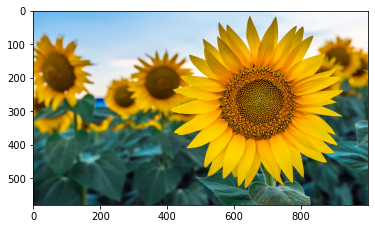

In [ ]:
plt.imshow(a[...,::-1])

In [ ]:
b=cv2.resize(a,(224,224))

In [ ]:
b=np.reshape(b,(1,224,224,3))

In [ ]:
y_predict=model1.predict(b)

In [ ]:
a1=np.argmax(y_predict,axis=1)

In [ ]:
a1

array([4])